### Markdown to study a few of the weird tracks to try and understand whats happening to them

In [1]:
import sys,os,os.path
sys.path.append("../../") # if you move files around, you need to adjust this!
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'


import random
import tables as tb
import numpy  as np
import pandas as pd
import invisible_cities.io.mcinfo_io as mcio

from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

from invisible_cities.database.load_db  import DataPMT, DataSiPM, SiPMNoise


from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch
from matplotlib.legend_handler import HandlerPatch



import imageio

from toolbox import functions as func

### List of events
Here is a list of the events we want to scrape, so lets just take a single file to look at.

In [39]:
data = pd.read_pickle('true_reco_v9.h5')
display(data)

# check if its doubled
print("If empty, everything is even")
display(data[data.event %2 != 0])

data_events = np.unique(data.event.to_numpy()) //2
display(data_events)
##########################################################################
##########################################################################
###### DODGY EVENT CURRENTLY HARD-SET HERE
##########################################################################
##########################################################################
evt = 20114
data_events = [evt//2]

event  true_tracks  reco_tracks  reco-true
0          16            1            1          0
1         176            1            1          0
2         198            2            2          0
3         272            3            3          0
4         418            2            2          0
...       ...          ...          ...        ...
1352  5960518            3            3          0
1353  5980056            3            3          0
1354  5980362            4            3         -1
1355  5980392            6            2         -4
1356  5980522            2            1         -1

[1357 rows x 4 columns]

If empty, everything is even


Empty DataFrame
Columns: [event, true_tracks, reco_tracks, reco-true]
Index: []

array([      8,      88,      99, ..., 2990181, 2990196, 2990261])

In [40]:
# load in a particular MC file

path = 'data/sophronia_2_208Tl.h5'
path_beer = 'data/beersheba_2_208Tl.h5'

# hits
dfMC_5 = mcio.load_mchits_df(path).reset_index()
# particles
dfP_5 = mcio.load_mcparticles_dfnew(path).reset_index()
# events
eventsMC_5 = np.unique(dfMC_5.event_id.to_numpy())

display(dfMC_5)
display(dfP_5)
display(eventsMC_5)

# reco

reco_5 = pd.read_hdf(path, 'RECO/Events')
display(reco_5)
# even checker. this one is all even
display(reco_5[reco_5.event % 2 != 0])
display(reco_5[reco_5.event == 16])

print("====================================================================")
print("beersheba")
print("====================================================================")

deco_5 = pd.read_hdf(path_beer, 'DECO/Events')
display(deco_5)
# even checker. this one is all even
display(deco_5[deco_5.event % 2 != 0])
display(deco_5[deco_5.event == 16])

event_id  particle_id  hit_id           x           y           z  \
0          10000           49       0  232.899506   81.578583  323.210205   
1          10000           49       1  435.411011   -0.355615  661.732544   
2          10000           49       2  213.952118 -135.128693  639.365662   
3          10000           80       0  213.951920 -135.128647  639.365723   
4          10000           79       0  213.952072 -135.128723  639.365601   
...          ...          ...     ...         ...         ...         ...   
121201     10350           68      11  470.422150   24.245047  223.611862   
121202     10350           68      12  470.425171   24.249077  223.606094   
121203     10350           68      13  470.425171   24.245848  223.602036   
121204     10350           68      14  470.422455   24.243744  223.602478   
121205     10350           68      15  470.423645   24.243284  223.603195   

            time    energy   label  
0       1.548109  0.000015  ACTIVE  
1       2.892010  0.000188  ACTIVE  
2       3.759970  0.000212  ACTIVE  
3       3.760047  0.000021  ACTIVE  
4       3.759983  0.000046  ACTIVE  
...          ...       ...     ...  
121201  1.646427  0.001392  ACTIVE  
121202  1.646622  0.001088  ACTIVE  
121203  1.646773  0.000858  ACTIVE  
121204  1.646890  0.001234  ACTIVE  
121205  1.646958  0.001289  ACTIVE  

[121206 rows x 9 columns]

event_id  particle_id    particle_name  primary  mother_id   initial_x  \
0         10000            1            Tl208     True          0  396.113861   
1         10000            4               e-    False          1  396.113861   
2         10000            3        anti_nu_e    False          1  396.113861   
3         10000            2  Pb208[3475.078]    False          1  396.113861   
4         10000           15               e-    False          2  396.113861   
...         ...          ...              ...      ...        ...         ...   
27088     10350           72               e-    False         70  457.228912   
27089     10350           71               e-    False         70  457.228912   
27090     10350           69               e-    False         50  466.799591   
27091     10350           68               e-    False         50  470.282227   
27092     10350           48            Pb208    False         35  394.281525   

        initial_y   initial_z  initial_t       final_x  ...  \
0      398.954498  531.353760   0.000000    396.113861  ...   
1      398.954498  531.353760   0.000356    395.006226  ...   
2      398.954498  531.353760   0.000356  12500.000000  ...   
3      398.954498  531.353760   0.000356    396.113861  ...   
4      398.954498  531.353760   0.000356    405.008881  ...   
...           ...         ...        ...           ...  ...   
27088  -13.361073  184.027695   1.846780    457.177429  ...   
27089  -13.361073  184.027695   1.846780    457.217072  ...   
27090   -3.616418  205.941391   1.755199    466.970703  ...   
27091   24.359922  223.483459   1.638290    470.423645  ...   
27092  394.931366  531.377136   0.002837    394.280884  ...   

       initial_momentum_x  initial_momentum_y  initial_momentum_z  \
0                0.000000            0.000000            0.000000   
1               -1.032297            0.235670           -0.058922   
2                0.743142           -0.401924            0.147308   
3                0.289147            0.166249           -0.088384   
4               -0.475894            0.044905            0.029884   
...                   ...                 ...                 ...   
27088           -0.063051            0.141696            0.046140   
27089           -0.031183            0.056689           -0.009893   
27090            0.130722            0.022294           -0.120871   
27091            0.043624           -0.081565            0.161780   
27092           -0.385908            1.969792            1.675301   

      final_momentum_x final_momentum_y  final_momentum_z    kin_energy  \
0             0.000000         0.000000          0.000000  0.000000e+00   
1             0.000000         0.000000         -0.000000  6.661877e-01   
2             0.743142        -0.401924          0.147308  8.576140e-01   
3             0.000000         0.000000         -0.000000  3.073364e-07   
4             0.000000        -0.000000         -0.000000  1.893614e-01   
...                ...              ...               ...           ...   
27088         0.000000         0.000000          0.000000  2.500660e-02   
27089        -0.000000         0.000000          0.000000  4.174693e-03   
27090         0.000000         0.000000          0.000000  3.058657e-02   
27091         0.000000        -0.000000          0.000000  3.292065e-02   
27092        -0.000000         0.000000          0.000000  1.764606e-05   

             length      creator_proc        final_proc  
0          0.000000              none  RadioactiveDecay  
1          1.441862  RadioactiveDecay             eIoni  
2      13968.352539  RadioactiveDecay    Transportation  
3          0.000000  RadioactiveDecay  RadioactiveDecay  
4         23.838150  RadioactiveDecay             eIoni  
...             ...               ...               ...  
27088      0.986469              phot             eIoni  
27089      0.078525              phot             eIoni  
27090      1.568488      

array([10000, 10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008,
       10009, 10010, 10011, 10012, 10013, 10014, 10015, 10016, 10017,
       10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026,
       10027, 10028, 10029, 10030, 10031, 10032, 10033, 10034, 10035,
       10036, 10037, 10038, 10039, 10040, 10041, 10042, 10043, 10044,
       10045, 10046, 10047, 10048, 10049, 10050, 10051, 10052, 10053,
       10054, 10055, 10056, 10057, 10058, 10059, 10060, 10061, 10062,
       10063, 10064, 10065, 10066, 10067, 10068, 10069, 10070, 10071,
       10072, 10073, 10074, 10075, 10076, 10077, 10078, 10079, 10080,
       10081, 10082, 10083, 10084, 10085, 10086, 10087, 10088, 10089,
       10090, 10091, 10092, 10093, 10094, 10095, 10096, 10097, 10098,
       10099, 10100, 10101, 10102, 10103, 10104, 10105, 10106, 10107,
       10108, 10109, 10110, 10111, 10112, 10113, 10114, 10115, 10116,
       10117, 10118, 10119, 10120, 10121, 10122, 10123, 10124, 10125,
       10126, 10127,

event          time  npeak       Xpeak      Ypeak  nsipm        X  \
0       20000  2.000007e+10      0  231.958342  84.964679      1  209.925   
1       20000  2.000007e+10      0  231.958342  84.964679      1  225.475   
2       20000  2.000007e+10      0  231.958342  84.964679      1  225.475   
3       20000  2.000007e+10      0  231.958342  84.964679      1  225.475   
4       20000  2.000007e+10      0  231.958342  84.964679      1  241.025   
...       ...           ...    ...         ...        ...    ...      ...   
152869  20700  2.070095e+10      0  466.674404   0.870954      1  458.725   
152870  20700  2.070095e+10      0  466.674404   0.870954      1  474.275   
152871  20700  2.070095e+10      0  466.674404   0.870954      1  474.275   
152872  20700  2.070095e+10      0  466.674404   0.870954      1  474.275   
152873  20700  2.070095e+10      0  466.674404   0.870954      1  489.825   

              Y  Xrms  Yrms           Z          Q           E   Qc        Ec  \
0        85.525   0.0   0.0  318.182484   9.913043  561.926323 -1.0  0.001743   
1        69.975   0.0   0.0  318.182484  10.608696  601.359795 -1.0  0.001882   
2        85.525   0.0   0.0  318.182484  11.594203  657.223805 -1.0  0.002059   
3       101.075   0.0   0.0  318.182484   5.565217  315.467403 -1.0  0.000993   
4        69.975   0.0   0.0  318.182484  11.768116  667.082160 -1.0  0.002122   
...         ...   ...   ...         ...        ...         ...  ...       ...   
152869   38.875   0.0   0.0  229.968720  18.724638  666.492462 -1.0  0.002416   
152870   23.325   0.0   0.0  229.968720   7.594203  270.311183 -1.0  0.001137   
152871   38.875   0.0   0.0  229.968720  15.246376  542.685777 -1.0  0.002283   
152872   54.425   0.0   0.0  229.968720   4.231884  150.631419 -1.0  0.000654   
152873   23.325   0.0   0.0  229.968720   4.521739  160.948637 -1.0  0.001076   

        track_id   Ep  
0             -1 -1.0  
1             -1 -1.0  
2             -1 -1.0  
3             -1 -1.0  
4             -1 -1.0  
...          ...  ...  
152869        -1 -1.0  
152870        -1 -1.0  
152871        -1 -1.0  
152872        -1 -1.0  
152873        -1 -1.0  

[152874 rows x 17 columns]

Empty DataFrame
Columns: [event, time, npeak, Xpeak, Ypeak, nsipm, X, Y, Xrms, Yrms, Z, Q, E, Qc, Ec, track_id, Ep]
Index: []

Empty DataFrame
Columns: [event, time, npeak, Xpeak, Ypeak, nsipm, X, Y, Xrms, Yrms, Z, Q, E, Qc, Ec, track_id, Ep]
Index: []

beersheba


event  npeak        X       Y           Z         E       Xpeak  \
0        20000    0.0  225.875  82.575  318.182484  0.000030  231.958342   
1        20000    0.0  225.875  83.575  318.182484  0.000031  231.958342   
2        20000    0.0  225.875  84.575  318.182484  0.000029  231.958342   
3        20000    0.0  226.875  81.575  318.182484  0.000034  231.958342   
4        20000    0.0  226.875  82.575  318.182484  0.000039  231.958342   
...        ...    ...      ...     ...         ...       ...         ...   
2962524  20700    0.0  468.875  37.575  229.968720  0.000068  466.674404   
2962525  20700    0.0  469.875  33.575  229.968720  0.000057  466.674404   
2962526  20700    0.0  469.875  34.575  229.968720  0.000065  466.674404   
2962527  20700    0.0  469.875  35.575  229.968720  0.000064  466.674404   
2962528  20700    0.0  469.875  36.575  229.968720  0.000054  466.674404   

             Ypeak          time  nsipm  Xrms  Yrms  
0        84.964679  2.000007e+10      0     0     0  
1        84.964679  2.000007e+10      0     0     0  
2        84.964679  2.000007e+10      0     0     0  
3        84.964679  2.000007e+10      0     0     0  
4        84.964679  2.000007e+10      0     0     0  
...            ...           ...    ...   ...   ...  
2962524   0.870954  2.070095e+10      0     0     0  
2962525   0.870954  2.070095e+10      0     0     0  
2962526   0.870954  2.070095e+10      0     0     0  
2962527   0.870954  2.070095e+10      0     0     0  
2962528   0.870954  2.070095e+10      0     0     0  

[2962529 rows x 12 columns]

Empty DataFrame
Columns: [event, npeak, X, Y, Z, E, Xpeak, Ypeak, time, nsipm, Xrms, Yrms]
Index: []

Empty DataFrame
Columns: [event, npeak, X, Y, Z, E, Xpeak, Ypeak, time, nsipm, Xrms, Yrms]
Index: []

### find events in this file that are in our list (our list is not multiplied yet it seems)

In [41]:

dfMC_dodgy = dfMC_5[dfMC_5.event_id.isin(data_events)]
display(dfMC_dodgy)

dfP_dodgy = dfP_5[dfP_5.event_id.isin(data_events)]
display(dfP_dodgy)

event_id  particle_id  hit_id           x           y           z  \
21304     10057           29       0  241.871323  189.369980  707.619019   
21305     10057           28       0  241.892151  189.236145  708.575073   
21306     10057           28       1  241.893005  189.354111  709.402222   
21307     10057           28       2  241.939911  189.087570  710.188110   
21308     10057           28       3  241.317520  188.897064  710.693970   
...         ...          ...     ...         ...         ...         ...   
21972     10057          110       0  168.440414  175.863510  757.193115   
21973     10057          110       1  168.443329  175.865799  757.186646   
21974     10057          110       2  168.445267  175.865601  757.190979   
21975     10057          110       3  168.446686  175.864609  757.189758   
21976     10057          110       4  168.447189  175.863953  757.189941   

           time        energy   label  
21304  1.216794  9.401847e-07  ACTIVE  
21305  1.055332  2.142196e-03  ACTIVE  
21306  1.059632  3.070503e-03  ACTIVE  
21307  1.063937  4.541441e-03  ACTIVE  
21308  1.068248  3.554344e-03  ACTIVE  
...         ...           ...     ...  
21972  1.408736  1.281715e-05  ACTIVE  
21973  1.408927  1.214416e-03  ACTIVE  
21974  1.409070  1.440954e-03  ACTIVE  
21975  1.409156  9.297910e-04  ACTIVE  
21976  1.409206  8.051426e-04  ACTIVE  

[673 rows x 9 columns]

event_id  particle_id    particle_name  primary  mother_id   initial_x  \
4621     10057            1            Tl208     True          0  397.984253   
4622     10057            4               e-    False          1  397.984253   
4623     10057            3        anti_nu_e    False          1  397.984253   
4624     10057            2  Pb208[3197.711]    False          1  397.984253   
4625     10057            6            gamma    False          2  397.984253   
...        ...          ...              ...      ...        ...         ...   
4746     10057          113               e-    False         69  168.438538   
4747     10057          112               e-    False         69  168.438538   
4748     10057          111               e-    False         69  168.438538   
4749     10057          110               e-    False         69  168.438538   
4750     10057           25            Pb208    False          5  397.984253   

       initial_y   initial_z  initial_t      final_x  ...  initial_momentum_x  \
4621  397.612854  531.064514   0.000000   397.984253  ...            0.000000   
4622  397.612854  531.064514   0.001339   398.968445  ...            0.086542   
4623  397.612854  531.064514   0.001339 -6347.327148  ...           -0.632984   
4624  397.612854  531.064514   0.001339   397.984253  ...            0.546442   
4625  397.612854  531.064514   0.001339   156.484268  ...           -0.163990   
...          ...         ...        ...          ...  ...                 ...   
4746  175.863159  757.194031   1.408682   168.438904  ...           -0.005358   
4747  175.863159  757.194031   1.408682   168.438660  ...            0.004948   
4748  175.863159  757.194031   1.408682   168.435547  ...           -0.032165   
4749  175.863159  757.194031   1.408682   168.447189  ...           -0.004560   
4750  397.612854  531.064514   0.001339   397.986420  ...            1.297816   

      initial_momentum_y  initial_momentum_z final_momentum_x  \
4621            0.000000            0.000000         0.000000   
4622            0.021546            0.606672         0.000000   
4623           -0.629346           -1.222842        -0.632984   
4624            0.607800            0.616170         0.000000   
4625           -0.372332           -0.417833         0.000000   
...                  ...                 ...              ...   
4746           -0.005983           -0.009455         0.000000   
4747           -0.004573            0.013999         0.000000   
4748           -0.029887           -0.033755        -0.000000   
4749            0.006800           -0.066726         0.000000   
4750            1.731188           -1.467754         0.000000   

     final_momentum_y  final_momentum_z  kin_energy        length  \
4621         0.000000          0.000000    0.000000      0.000000   
4622        -0.000000         -0.000000    0.287202      7.190253   
4623        -0.629346         -1.222842    1.513964  16133.371094   
4624         0.000000          0.000000    0.000003      0.000000   
4625        -0.000000         -0.000000    0.583188    844.181335   
...               ...               ...         ...           ...   
4746        -0.000000          0.000000    0.000151      0.000069   
4747        -0.000000          0.000000    0.000236      0.001293   
4748        -0.000000          0.000000    0.002992      0.060922   
4749        -0.000000          0.000000    0.004403      0.066836   
4750         0.000000         -0.000000    0.000018      0.004373   

          creator_proc        final_proc  
4621              none  RadioactiveDecay  
4622  RadioactiveDecay             eIoni  
4623  RadioactiveDecay    Transportation  
4624  RadioactiveDecay  RadioactiveDecay  
4625  RadioactiveDecay              phot  
...                ...               ...  
4746              phot               msc  
4747              phot             eIoni  
4748              phot             eIoni  
4749              phot          

In [42]:
# display more of the particle MC stuff
pd.set_option('display.max_rows', 100)
display(dfP_dodgy)

event_id  particle_id    particle_name  primary  mother_id   initial_x  \
4621     10057            1            Tl208     True          0  397.984253   
4622     10057            4               e-    False          1  397.984253   
4623     10057            3        anti_nu_e    False          1  397.984253   
4624     10057            2  Pb208[3197.711]    False          1  397.984253   
4625     10057            6            gamma    False          2  397.984253   
...        ...          ...              ...      ...        ...         ...   
4746     10057          113               e-    False         69  168.438538   
4747     10057          112               e-    False         69  168.438538   
4748     10057          111               e-    False         69  168.438538   
4749     10057          110               e-    False         69  168.438538   
4750     10057           25            Pb208    False          5  397.984253   

       initial_y   initial_z  initial_t      final_x  ...  initial_momentum_x  \
4621  397.612854  531.064514   0.000000   397.984253  ...            0.000000   
4622  397.612854  531.064514   0.001339   398.968445  ...            0.086542   
4623  397.612854  531.064514   0.001339 -6347.327148  ...           -0.632984   
4624  397.612854  531.064514   0.001339   397.984253  ...            0.546442   
4625  397.612854  531.064514   0.001339   156.484268  ...           -0.163990   
...          ...         ...        ...          ...  ...                 ...   
4746  175.863159  757.194031   1.408682   168.438904  ...           -0.005358   
4747  175.863159  757.194031   1.408682   168.438660  ...            0.004948   
4748  175.863159  757.194031   1.408682   168.435547  ...           -0.032165   
4749  175.863159  757.194031   1.408682   168.447189  ...           -0.004560   
4750  397.612854  531.064514   0.001339   397.986420  ...            1.297816   

      initial_momentum_y  initial_momentum_z final_momentum_x  \
4621            0.000000            0.000000         0.000000   
4622            0.021546            0.606672         0.000000   
4623           -0.629346           -1.222842        -0.632984   
4624            0.607800            0.616170         0.000000   
4625           -0.372332           -0.417833         0.000000   
...                  ...                 ...              ...   
4746           -0.005983           -0.009455         0.000000   
4747           -0.004573            0.013999         0.000000   
4748           -0.029887           -0.033755        -0.000000   
4749            0.006800           -0.066726         0.000000   
4750            1.731188           -1.467754         0.000000   

     final_momentum_y  final_momentum_z  kin_energy        length  \
4621         0.000000          0.000000    0.000000      0.000000   
4622        -0.000000         -0.000000    0.287202      7.190253   
4623        -0.629346         -1.222842    1.513964  16133.371094   
4624         0.000000          0.000000    0.000003      0.000000   
4625        -0.000000         -0.000000    0.583188    844.181335   
...               ...               ...         ...           ...   
4746        -0.000000          0.000000    0.000151      0.000069   
4747        -0.000000          0.000000    0.000236      0.001293   
4748        -0.000000          0.000000    0.002992      0.060922   
4749        -0.000000          0.000000    0.004403      0.066836   
4750         0.000000         -0.000000    0.000018      0.004373   

          creator_proc        final_proc  
4621              none  RadioactiveDecay  
4622  RadioactiveDecay             eIoni  
4623  RadioactiveDecay    Transportation  
4624  RadioactiveDecay  RadioactiveDecay  
4625  RadioactiveDecay              phot  
...                ...               ...  
4746              phot               msc  
4747              phot             eIoni  
4748              phot             eIoni  
4749              phot          

### using the magic `plot_nexus` 

but we lightly modify it to allow for specific events to be passed in instead

In [53]:
def plot_nexus(mchits,
               mcparts,
               event, 
               toggle_arrows = True,
               toggle_mother = True, 
               xyzlims = [(0,0,0), (0,0,0)], 
               plot_only = None,
               rotate = 0):
    '''
    xyzlims is [(xmin, ymin, zmin), (xmax, ymax, zmax)]

    this one takes the true event name.
    '''
    # flags to add
    # - remove annoying electrons

    # collect relevant information (hits and particle info)
    dfMC = mchits
    dfP = mcparts
    eventsMC = np.unique(dfMC.event_id.to_numpy())

    # event of interest
    evt = event

    print(f"Event: {evt}")

    # select xyz hits
    hits_xyz = dfMC.groupby("event_id").get_group(evt)[["x", "y", "z"]].values
    hits_particle_id = dfMC.groupby("event_id").get_group(evt)["particle_id"].values
    
    # select particles in event
    event_particles = dfP.groupby("event_id").get_group(evt)
    unique_particles = event_particles["particle_name"].unique()

    print(f"Unique particles: {unique_particles}")
    
    colors = dict(zip(unique_particles, plt.cm.tab20.colors))

    # get primary particle positional information and name
    primary_xyz = event_particles.loc[event_particles["primary"] == True][
        ["initial_x", "initial_y", "initial_z"]
    ].values

    primary_name = event_particles.loc[event_particles["primary"] == True][
        "particle_name"
    ].values[0]

    primary_color = colors[primary_name]

    # Scatter plot the sipm positions with the PE values
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")

    # Plot MC hits
    hits_colors = [colors[event_particles.loc[event_particles["particle_id"] == pid]["particle_name"].values[0]] for pid in hits_particle_id]
    ax.scatter(hits_xyz[:, 0], hits_xyz[:, 1], hits_xyz[:, 2], c=hits_colors, s=5, alpha = 1, label="MC hits", marker = "D")

    if xyzlims == 'hits':
        # get current axis limits to ensure hits are in frame
        x_min, x_max = ax.get_xlim()
        y_min, y_max = ax.get_ylim()
        z_min, z_max = ax.get_zlim()
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_zlim(z_min, z_max)
        
    # Plot the primary particle
    ax.scatter(
        primary_xyz[0][0],
        primary_xyz[0][1],
        primary_xyz[0][2],
        c="k",
        s=100,
        marker="x",
        label="Primary particle",
    )

    if xyzlims == 'primary':
        # get current axis limits to ensure primary particle is in frame
        x_min, x_max = ax.get_xlim()
        y_min, y_max = ax.get_ylim()
        z_min, z_max = ax.get_zlim()
    

    # Plot all the particles
    # Add a legend item for each unique particle
    for particle_name, color in colors.items():
        ax.scatter([], [], c=[color], label=particle_name)

    legend1 = ax.legend(loc = "upper left")

    event_particles_grouped = event_particles.groupby("particle_id")
    for i, pid in enumerate(event_particles["particle_id"].unique()):
        length = event_particles_grouped.get_group(pid)["length"].values[0]
        init_xyz = event_particles_grouped.get_group(pid)[["initial_x", "initial_y", "initial_z"]].values[0]
        final_xyz = event_particles_grouped.get_group(pid)[["final_x", "final_y", "final_z"]].values[0]
        initial_momentum_xyz = event_particles_grouped.get_group(pid)[["initial_momentum_x", "initial_momentum_y", "initial_momentum_z"]].values[0]
        final_momentum_xyz = event_particles_grouped.get_group(pid)[["final_momentum_x", "final_momentum_y", "final_momentum_z"]].values[0]
        # normalize momenta
        initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
        final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)
        pname = event_particles_grouped.get_group(pid)["particle_name"].values[0]

        # check if you want to plot the particle
        if plot_only != None:
            if pname not in plot_only:
                continue
            
        # If the length is smaller than 1 mm, we make a scatter plot of the initial position.
        if length < 1.0:
            ax.scatter(init_xyz[0], init_xyz[1], init_xyz[2], color=colors[pname], s=10)
        else:
            ax.plot(
                [init_xyz[0], final_xyz[0]],
                [init_xyz[1], final_xyz[1]],
                [init_xyz[2], final_xyz[2]],
                c=colors[pname],
            )


        # plot a thin dashed line from the mother particle to the current particle
        if toggle_mother == True:
            mother_id = event_particles_grouped.get_group(pid)["mother_id"].values[0]
            if mother_id != 0:
                mother_xyz = event_particles_grouped.get_group(mother_id)[["final_x", "final_y", "final_z"]].values[0]
                mother_name = event_particles_grouped.get_group(mother_id)["particle_name"].values[0]
                ax.plot(
                    [mother_xyz[0], init_xyz[0]],
                    [mother_xyz[1], init_xyz[1]],
                    [mother_xyz[2], init_xyz[2]],
                    c=colors[mother_name],
                    linestyle="--",    
                )

        if toggle_arrows == True:
            # Add small arrows to indicate the direction of the particle at the start and end
            ax.quiver(
                init_xyz[0],
                init_xyz[1],
                init_xyz[2],
                initial_momentum_xyz[0],
                initial_momentum_xyz[1],
                initial_momentum_xyz[2],
                color=colors[pname],
                length=40,
            )
            ax.quiver(
                final_xyz[0],
                final_xyz[1],
                final_xyz[2],
                final_momentum_xyz[0],
                final_momentum_xyz[1],
                final_momentum_xyz[2],
                color=colors[pname],
                length=40,
            )

    ax.set_xlabel("X (mm)")
    ax.set_ylabel("Y (mm)")
    ax.set_zlabel("Z (mm)")
    if xyzlims[0] == 'self-set':
        ax.set_xlim(xyzlims[1][0], xyzlims[2][0])
        ax.set_ylim(xyzlims[1][1], xyzlims[2][1])
        ax.set_zlim(xyzlims[1][2], xyzlims[2][2])
    

    # Add custom legend entries for the second legend
    arrow_line = Line2D([0], [0], color="blue", linestyle="-", marker=">", markersize=10)
    line = Line2D([0], [0], color="black", linestyle="--", lw=2)
    straight_line = Line2D([0], [0], color = "red")

    # Add the custom legend
    legend2 = ax.legend(
        [arrow_line, line, straight_line],  # Custom handles
        ["direction of travel", "mother to daughter", "initial to final"],  # Labels
        loc="lower right"  # Position
    )

    # Add both legends to the plot
    ax.add_artist(legend1)
    ax.add_artist(legend2)

    ax.view_init(20, -rotate)
    fig.suptitle(f'LPR event {evt} - arrows: {toggle_arrows} mother: {toggle_mother}', fontsize = 20)
    #plt.show()


In [44]:
def plot_hits(mchits,
              mcparts,
              event,
              sophronia = False,
              sophronia_data = None,
              pitch = 15.55,
              plot_fig = True):
    


    # force figure
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection='3d')



    ###################################################

    evt = event

    true_part = mcparts[mcparts.event_id == evt]
    
    def return_id(number):
        return str(true_part[true_part.particle_id == number].particle_name.values).strip("'[]'")
    
    # 0th event
    true = mchits[mchits.event_id == evt]
    # select event
    true['particle_name'] = true['particle_id'].apply(return_id)
    
    
    
    for pid, df in true.groupby('particle_name'):
    
        xt = df.x
        yt = df.y
        zt = df.z
        et = df.energy*1000
    
    
        #if (pid == 'gamma') or (pid == 'Xe131') or (pid == 'Xe129'):
        #    q = ax.scatter3D(xt, yt, zt, alpha = 1, zorder = 0, label = str(pid), s = 10)
        #else:
        r = ax.scatter3D(xt, yt, zt, alpha = 1, zorder = 0, label = str(pid), s = 10)
    
    
    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.set_zlabel('Z (mm)')
    
    # Retrieve legend handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()
    
    # Create a single legend for all subplots
    legend = ax.legend(handles, labels, fontsize=15)
    for handle in legend.legendHandles:
        handle.set_alpha(1.0)
    
    plt.title('True Hits_YZ_' + str(evt), fontsize=30)



    #### shoehorning sophronia in here
    if sophronia == True:
        try:
            detector = "next100"

            data = sophronia_data[sophronia_data.event == event*2]
            
            x = data.X
            y = data.Y
            z = data.Z
            e = data.E
            q = data.E


            


            xx = np.arange(x.min(), x.max() + pitch, pitch)
            yy = np.arange(y.min(), y.max() + pitch, pitch)
            zz = z.unique()

            
            xflat = np.full_like(x, min(ax.get_xlim()))
            yflat = np.full_like(y, max(ax.get_ylim()))
            zflat = np.full_like(z, min(ax.get_zlim()))

            #ax.scatter(xflat, y, z, alpha = 0.005)
            ax.scatter(x, yflat, z, alpha = 0.005)
            ax.scatter(x, y, zflat, alpha = 0.005)

            #ax.hist2D(x, y, bins=[xx, yy], weights=q, cmin=0.0001)
        except Exception as e:
            print(e)


    if plot_fig == True:
        #
        # plt.savefig(f'plots/{evt}.png')
        plt.show()

    # will output the spacial values so you can use these with looking at the sophronia data
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    z_min, z_max = ax.get_zlim()
    return ((x_min, x_max), (y_min, y_max), (z_min, z_max))

In [45]:
def plot_sophronia_hits(reco, evt, xyzlims = None, pitch = 15.55):
    '''
    two plots, 2d then 3d
    '''
    
    # collect the relevant event

    data = reco[reco.event == evt]
    
    x = data.X
    y = data.Y
    z = data.Z
    e = data.Ec
    q = data.Q
    

    fig, axes = plt.subplots(1, 3, figsize=(18, 4))


    xx = np.arange(x.min(), x.max() + pitch, pitch)
    yy = np.arange(y.min(), y.max() + pitch, pitch)
    zz = z.unique()

    axes[0].hist2d(x, y, bins=[xx, yy], weights=q, cmin=0.0001);
    axes[0].set_xlabel('X (mm)');
    axes[0].set_ylabel('Y (mm)');

    axes[1].hist2d(x, z, bins=[xx, zz], weights=q, cmin=0.0001);
    axes[1].set_xlabel('X (mm)');
    axes[1].set_ylabel('Z (mm)');

    axes[2].hist2d(y, z, bins=[yy, zz], weights=q, cmin=0.0001);
    axes[2].set_xlabel('Y (mm)');
    axes[2].set_ylabel('Z (mm)');

    plt.title(f'LPR event {evt} - sophronia output')
    plt.show()

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection='3d')
    
    
    q = ax.scatter(x, y, z, c = e , alpha = 0.5, cmap = 'viridis')

    cb = fig.colorbar(q, ax=ax)
    cb.set_label("Energy (keV)")
    ax.set_xlabel('x (mm)')
    ax.set_ylabel('y (mm)')
    ax.set_zlabel('z (mm)')
    plt.title(f'LPR event {evt} - sophronia output')

    # you're setting them yourself from the true MC hits
    if xyzlims != None:
        ax.set_xlim(xyzlims[0])
        ax.set_ylim(xyzlims[1])
        ax.set_zlim(xyzlims[2])


    plt.show()

    

In [54]:
rotation_space = np.linspace(0, 359, 360, endpoint = True)

rotation = True
if rotation==True:
    for i in (rotation_space):
        # and plot everything
        plot_nexus(dfMC_dodgy, dfP_dodgy, data_events[0], xyzlims = ['self-set', [100, 100, 700], [250, 320, 830]], toggle_arrows = False, toggle_mother = True, rotate = i)
        plt.savefig(f'spinning/vox_angle_{i}.png')
        plt.close()
        #ax.view_init(-160, 90)


    files = [f for f in os.listdir('spinning/') if os.path.isfile(os.path.join('spinning/', f))]

    #sort files in a human manner
    files.sort(key=func.alphanum_key)
    images = []
    for filename in files:
        images.append(imageio.imread('spinning/' + filename))
    

    print("Creating gif...")
    gif_name = f'output/rotating_voxel_evt_{evt}.gif'
    imageio.mimsave(gif_name, images, loop = 0, fps = 15)

Event: 10057
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe129' 'e+' 'Pb208']


/tmp/ipykernel_18207/1837392934.py:100: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_18207/1837392934.py:101: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)


Event: 10057
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe129' 'e+' 'Pb208']
Event: 10057
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe129' 'e+' 'Pb208']
Event: 10057
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe129' 'e+' 'Pb208']
Event: 10057
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe129' 'e+' 'Pb208']
Event: 10057
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe129' 'e+' 'Pb208']
Event: 10057
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe129' 'e+' 'Pb208']
Event: 10057
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe129' 'e+' 'Pb208']
Event: 10057
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe129' 'e+' 'Pb208']
Event: 1

/tmp/ipykernel_18207/2351344478.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('spinning/' + filename))


Creating gif...


Event: 10057
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe129' 'e+' 'Pb208']


/tmp/ipykernel_18207/700543234.py:100: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_18207/700543234.py:101: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)


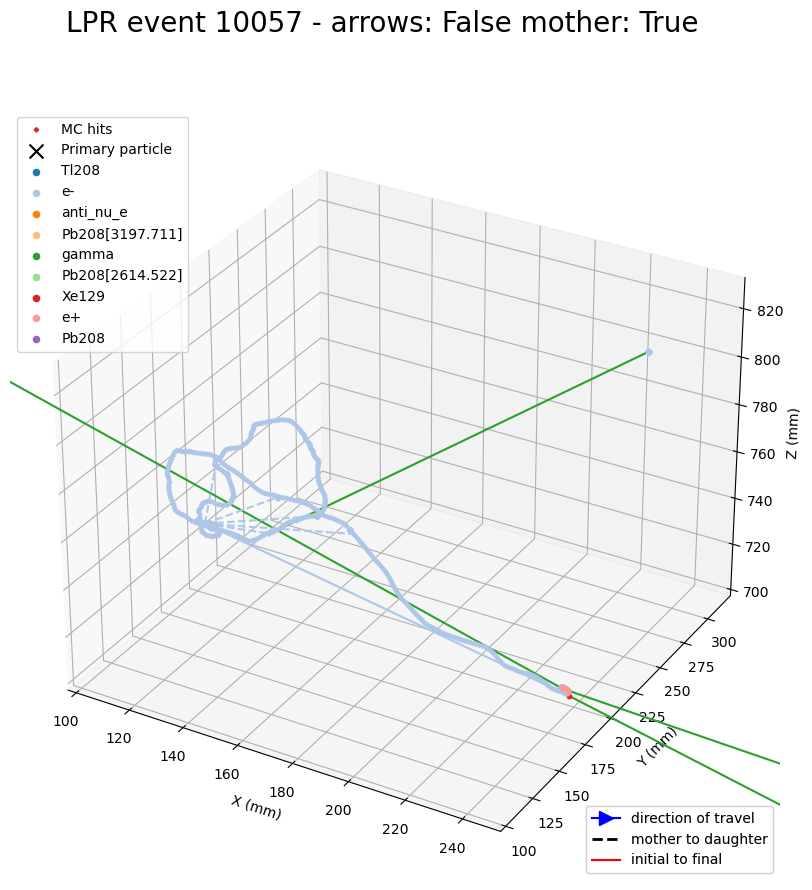

In [52]:
plot_nexus(dfMC_dodgy, dfP_dodgy, data_events[0], xyzlims = ['self-set', [100, 100, 700], [250, 320, 830]], toggle_arrows = False, toggle_mother = True)

### a slightly less messy way to look at all the hits

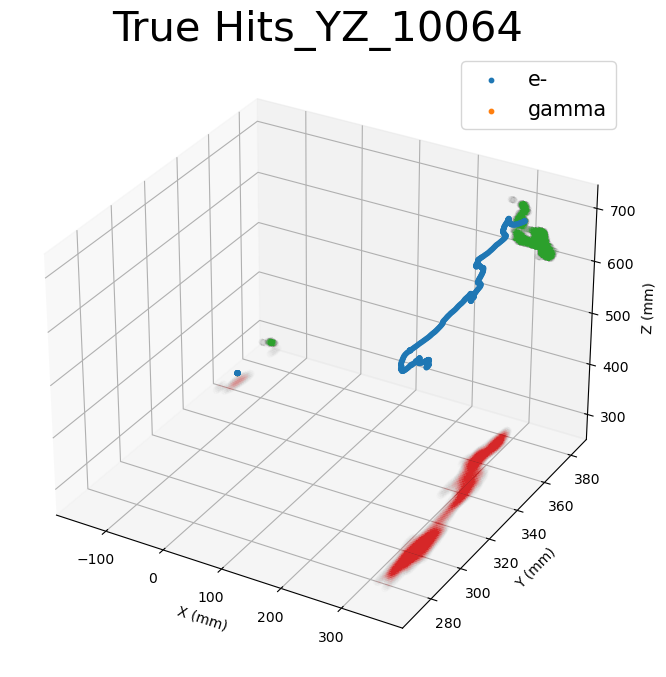

((-175.725, 387.475), (263.875, 389.275), (259.38250666442866, 733.7548020635987))


In [17]:
xyzlims = plot_hits(dfMC_dodgy, dfP_dodgy, data_events[0], sophronia = True, sophronia_data = deco_5)
print(xyzlims)

### then plot the sophronia output

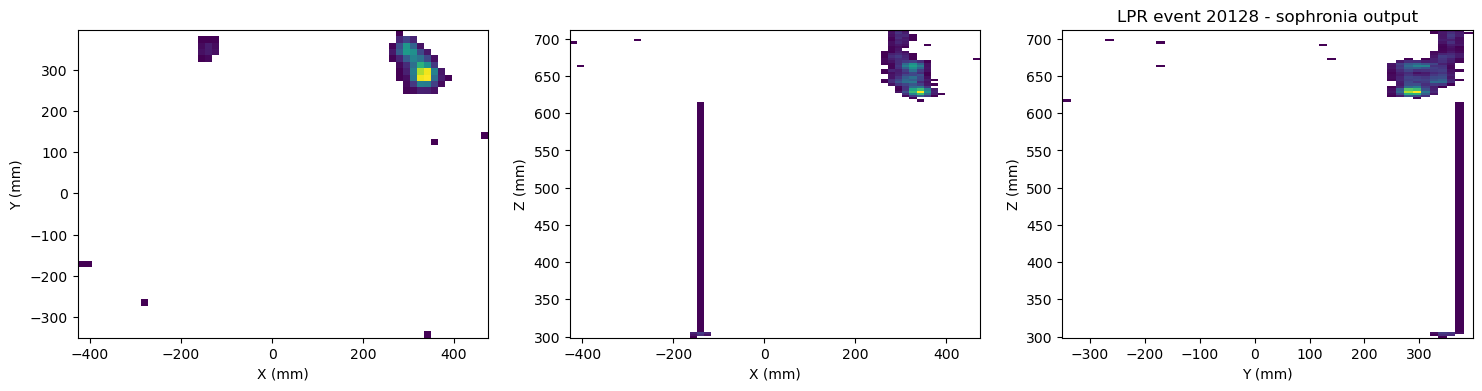

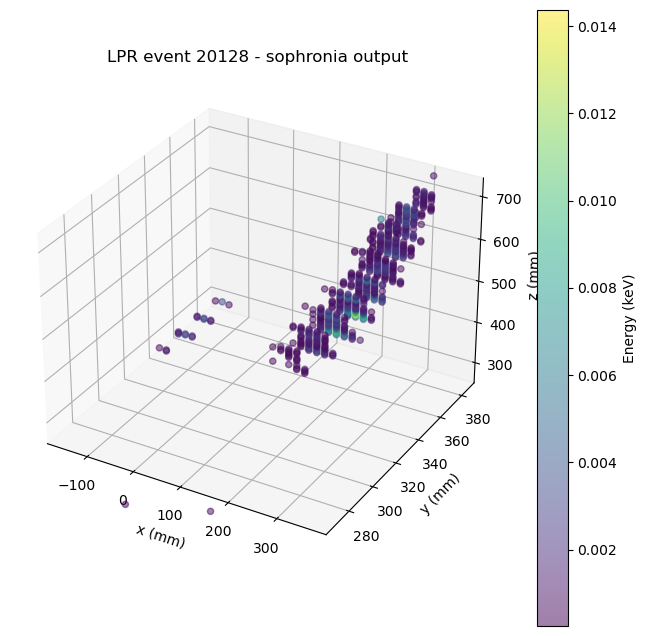

In [18]:
plot_sophronia_hits(reco_5, data_events[0]*2, xyzlims = xyzlims)

yikes, useless?

In [19]:
def plot_all_info(dfMC, dfP, r_t, event, deco):

    # plot wiht all the bells and whistles
    plot_nexus(dfMC, dfP, event, xyzlims = 'hits', toggle_arrows = False, toggle_mother = True)
    
    # plot just the hits for clarity
    x = plot_hits(dfMC, dfP, event, sophronia = True, sophronia_data = deco, plot_fig = False)

    # save it and show it after you implement box with true and reco track info
    rt_data = r_t[r_t.event == event*2]
    s = f"True tracks: {rt_data.true_tracks}\n Reco tracks: {rt_data.reco_tracks}"
    

    
    plt.savefig(f'plots/{event}.png')

    # print the reco - true track info. needs to be doubled because of MC/hits mismatch
    print("Track knowledge")
    display(r_t[r_t.event == event*2])

Event: 10064
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3708.451]' 'gamma' 'Pb208[3197.711]'
 'Pb208[2614.522]' 'F19' 'e+' 'Pb208']


/tmp/ipykernel_17416/1837392934.py:100: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_17416/1837392934.py:101: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)


Track knowledge


Empty DataFrame
Columns: [event, true_tracks, reco_tracks, reco-true]
Index: []

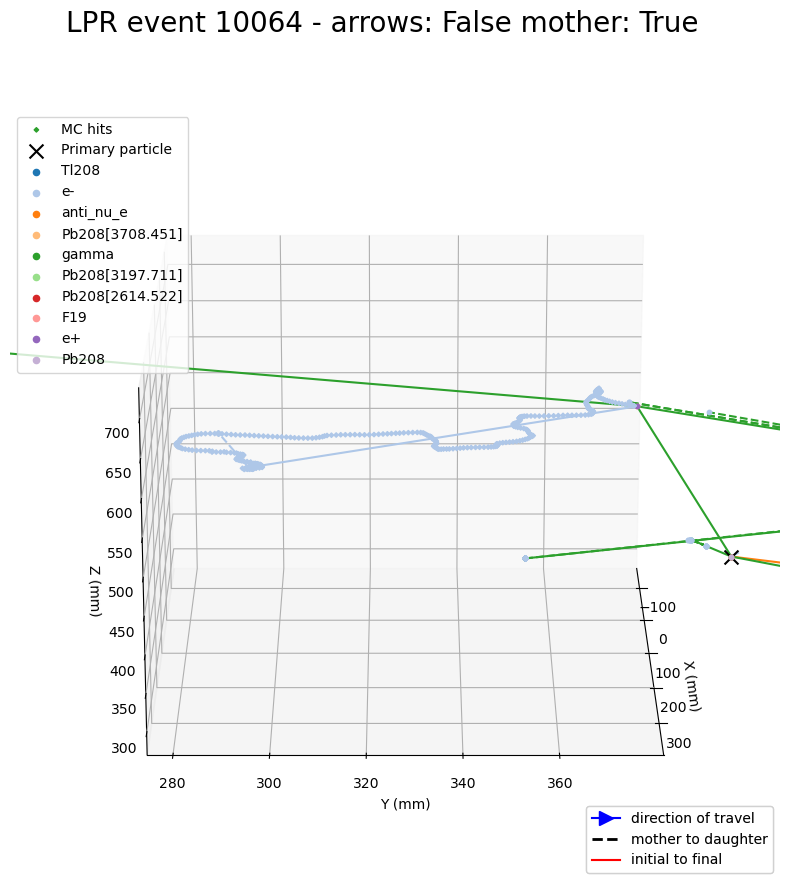

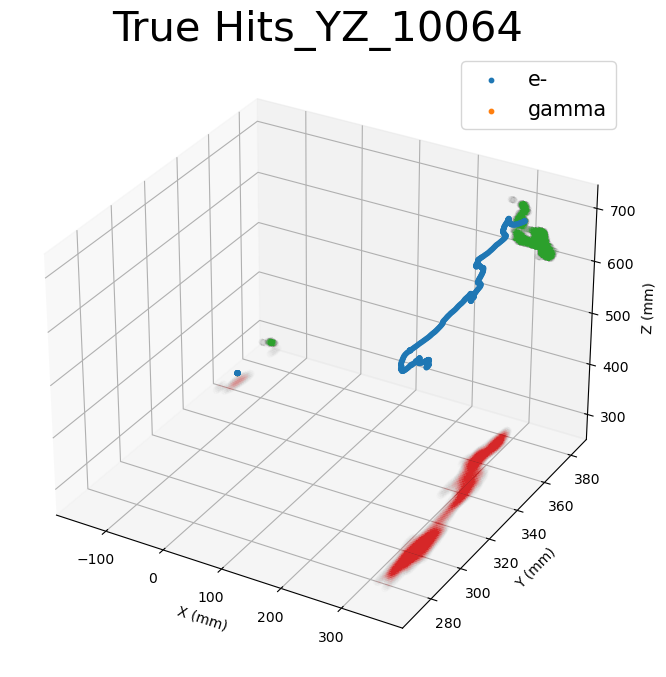

In [20]:
plot_all_info(dfMC_dodgy, dfP_dodgy, data, data_events[0], deco_5)

### load in lots of data at once and merge them into dataframes

array([      8,      88,      99, ..., 2990181, 2990196, 2990261])

Event: 2040017
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3475.078]' 'gamma' 'Pb208[3197.711]'
 'Pb208[2614.522]' 'Xe129' 'e+' 'Pb208']


/tmp/ipykernel_17416/1837392934.py:100: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_17416/1837392934.py:101: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)
/tmp/ipykernel_17416/2154395128.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['particle_name'] = true['particle_id'].apply(return_id)


Track knowledge


event  true_tracks  reco_tracks  reco-true
940  4080034            1            2          1

Event: 2040074
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe136' 'e+' 'Pb208']


/tmp/ipykernel_17416/1837392934.py:100: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_17416/1837392934.py:101: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)
/tmp/ipykernel_17416/2154395128.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['particle_name'] = true['particle_id'].apply(return_id)


Track knowledge


event  true_tracks  reco_tracks  reco-true
941  4080148            3            5          2

Event: 2040165
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe134' 'e+' 'Pb208']


/tmp/ipykernel_17416/1837392934.py:100: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_17416/1837392934.py:101: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)
/tmp/ipykernel_17416/2154395128.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['particle_name'] = true['particle_id'].apply(return_id)


Track knowledge


event  true_tracks  reco_tracks  reco-true
942  4080330            4            2         -2

Event: 2040213
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3475.078]' 'gamma' 'Pb208[3197.711]'
 'Pb208[2614.522]' 'Xe134' 'e+' 'Pb208']


/tmp/ipykernel_17416/1837392934.py:100: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_17416/1837392934.py:101: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)
/tmp/ipykernel_17416/2154395128.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['particle_name'] = true['particle_id'].apply(return_id)


Track knowledge


event  true_tracks  reco_tracks  reco-true
943  4080426            3            3          0

Event: 2040255
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe132' 'e+' 'Pb208']


/tmp/ipykernel_17416/1837392934.py:100: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_17416/1837392934.py:101: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)
/tmp/ipykernel_17416/2154395128.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['particle_name'] = true['particle_id'].apply(return_id)


Track knowledge


event  true_tracks  reco_tracks  reco-true
944  4080510            3            3          0

Event: 2040316
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe129' 'e+' 'Pb208']


/tmp/ipykernel_17416/1837392934.py:100: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_17416/1837392934.py:101: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)
/tmp/ipykernel_17416/2154395128.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['particle_name'] = true['particle_id'].apply(return_id)


Track knowledge


event  true_tracks  reco_tracks  reco-true
945  4080632            2            2          0

Event: 2040351
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe129' 'e+' 'Pb208']


/tmp/ipykernel_17416/1837392934.py:100: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_17416/1837392934.py:101: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)
/tmp/ipykernel_17416/2154395128.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['particle_name'] = true['particle_id'].apply(return_id)


Track knowledge


event  true_tracks  reco_tracks  reco-true
946  4080702            2            2          0

Event: 1950055
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3475.078]' 'gamma' 'Pb208[3197.711]'
 'Pb208[2614.522]' 'Xe131' 'e+' 'Pb208']


/tmp/ipykernel_17416/1837392934.py:100: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_17416/1837392934.py:101: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)
/tmp/ipykernel_17416/2154395128.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['particle_name'] = true['particle_id'].apply(return_id)


Track knowledge


event  true_tracks  reco_tracks  reco-true
898  3900110            1            1          0

Event: 1950145
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe132' 'e+' 'Pb208']


/tmp/ipykernel_17416/1837392934.py:100: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_17416/1837392934.py:101: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)
/tmp/ipykernel_17416/2154395128.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['particle_name'] = true['particle_id'].apply(return_id)


Track knowledge


event  true_tracks  reco_tracks  reco-true
899  3900290            2            2          0

Event: 1950179
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe132' 'e+' 'Pb208']


/tmp/ipykernel_17416/1837392934.py:100: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_17416/1837392934.py:101: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)
/tmp/ipykernel_17416/2154395128.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['particle_name'] = true['particle_id'].apply(return_id)


Track knowledge


event  true_tracks  reco_tracks  reco-true
900  3900358            4            3         -1

Event: 1950290
Unique particles: ['Tl208' 'e-' 'anti_nu_e' 'Pb208[3197.711]' 'gamma' 'Pb208[2614.522]'
 'Xe129' 'e+' 'Pb208']


/tmp/ipykernel_17416/1837392934.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 10))
/tmp/ipykernel_17416/1837392934.py:100: RuntimeWarning: invalid value encountered in true_divide
  initial_momentum_xyz = initial_momentum_xyz / np.linalg.norm(initial_momentum_xyz)
/tmp/ipykernel_17416/1837392934.py:101: RuntimeWarning: invalid value encountered in true_divide
  final_momentum_xyz = final_momentum_xyz / np.linalg.norm(final_momentum_xyz)
/tmp/ipykernel_17416/2154395128.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

KeyboardInterrupt: 

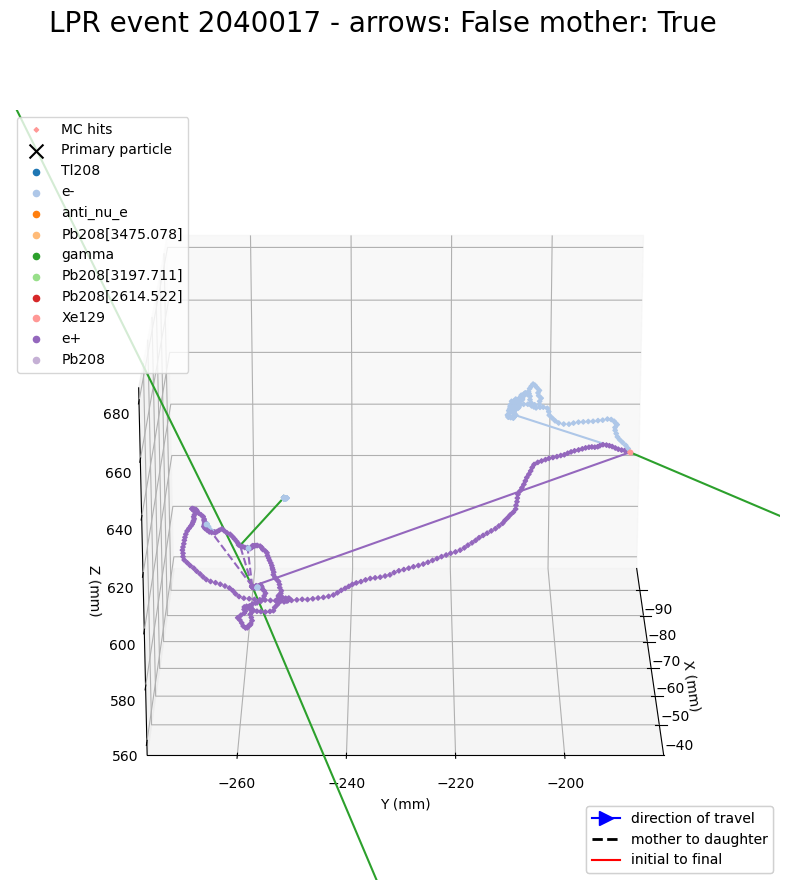

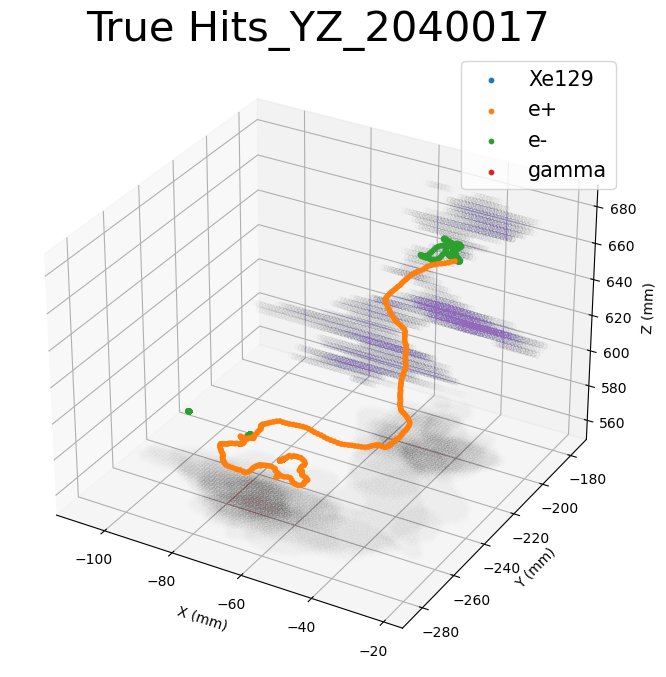

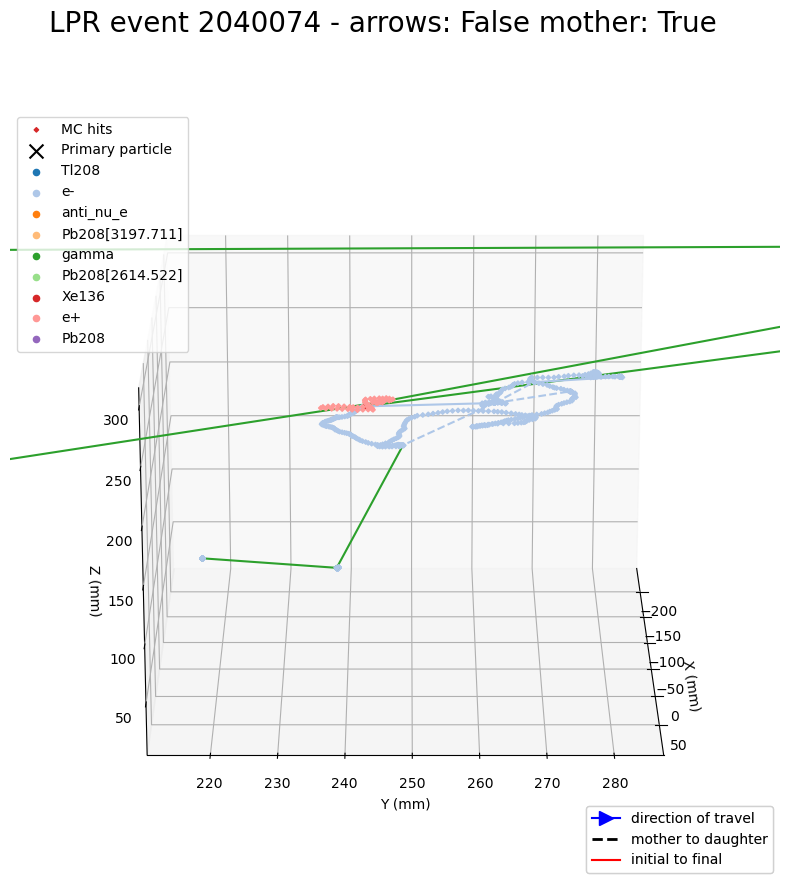

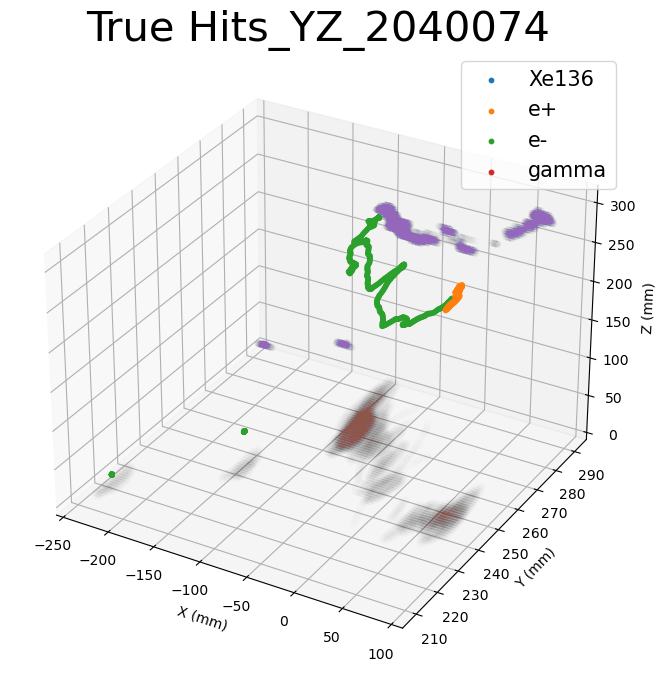

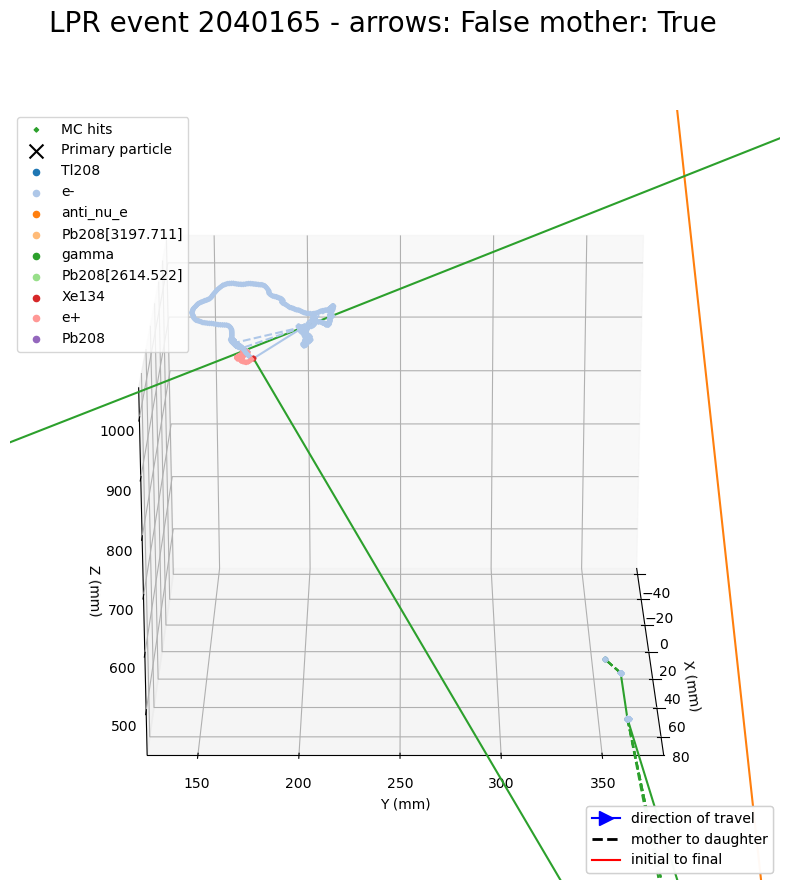

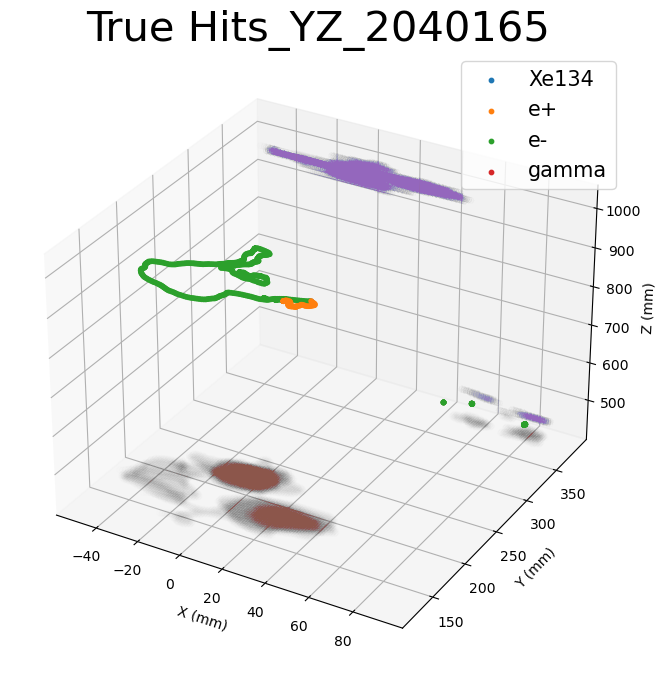

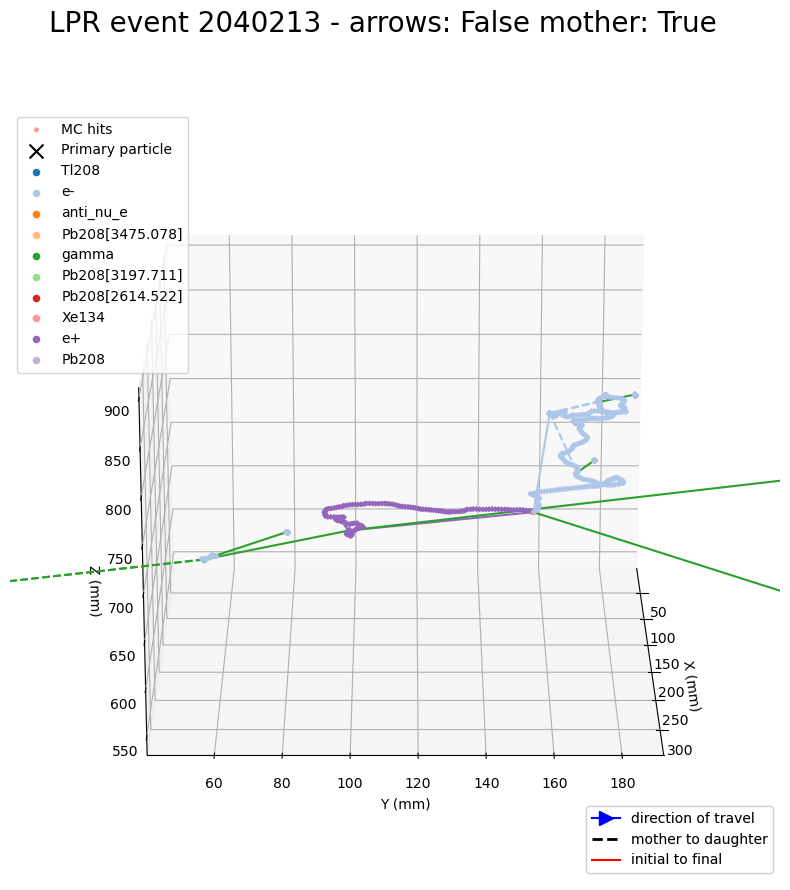

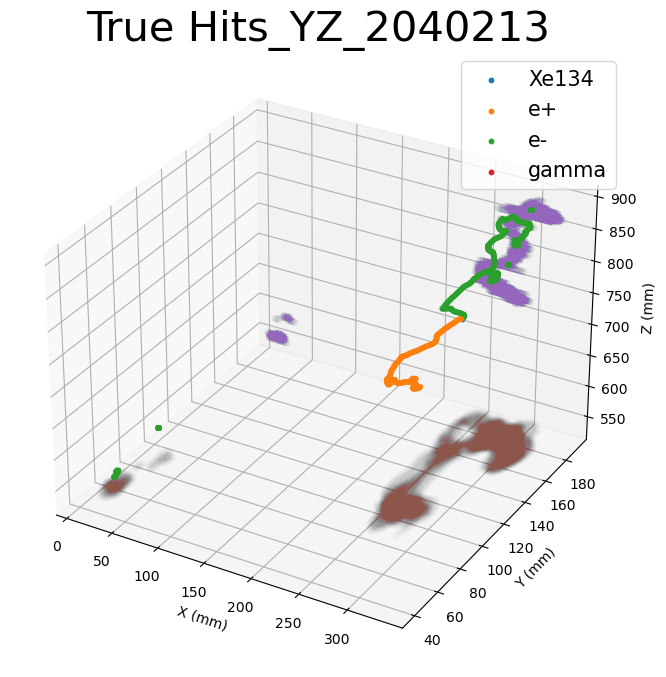

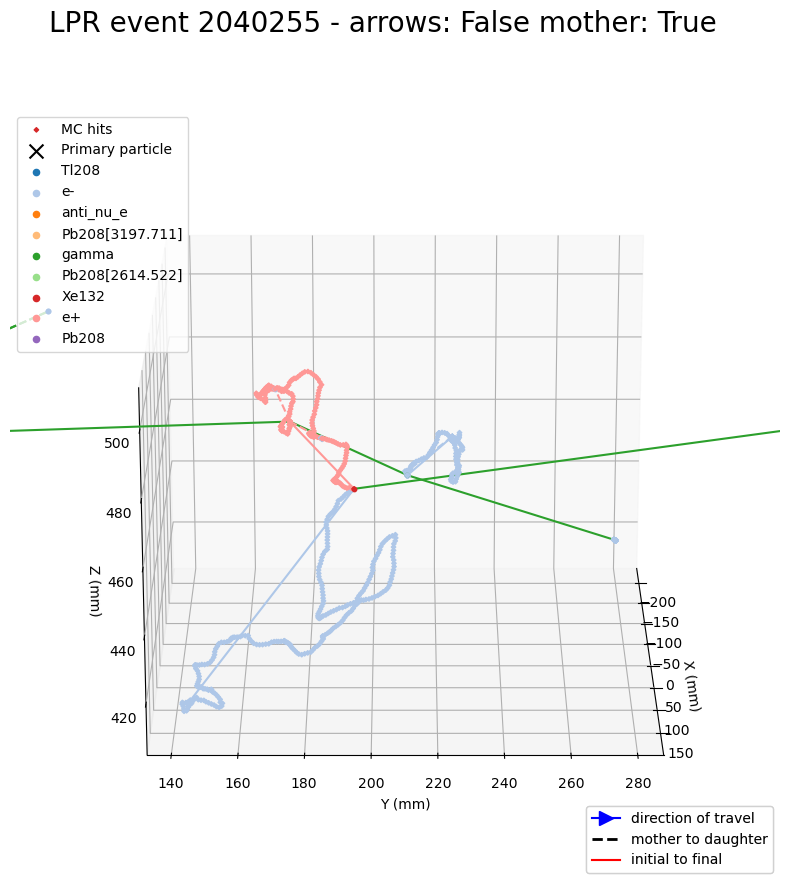

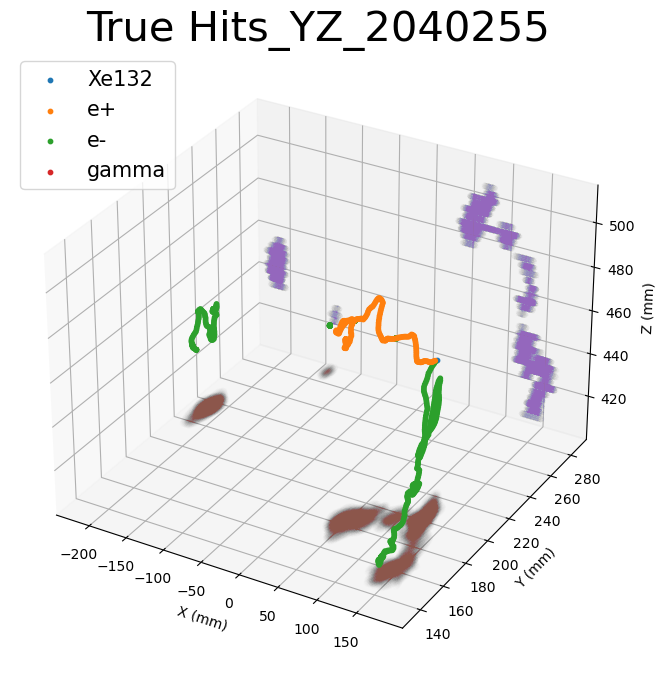

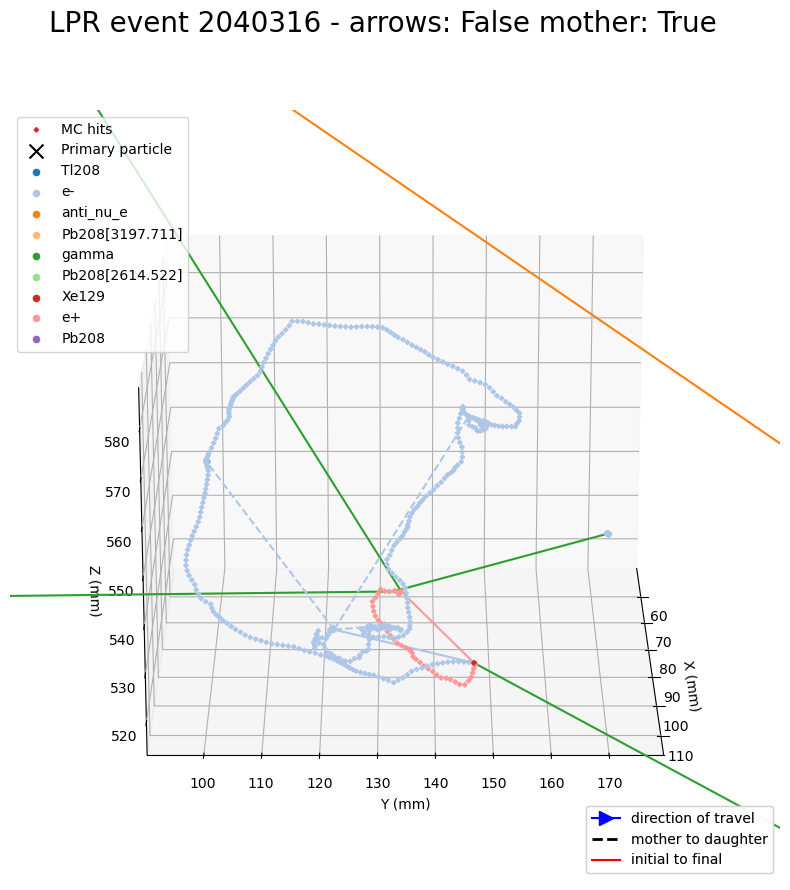

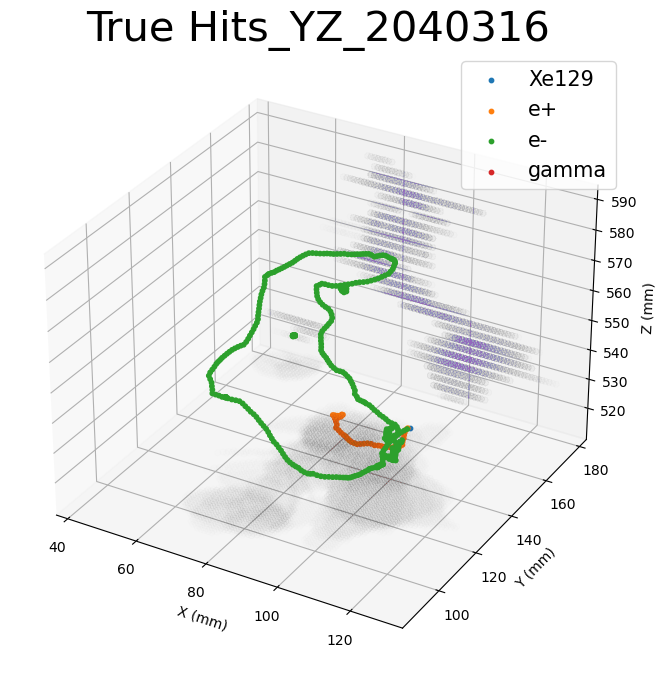

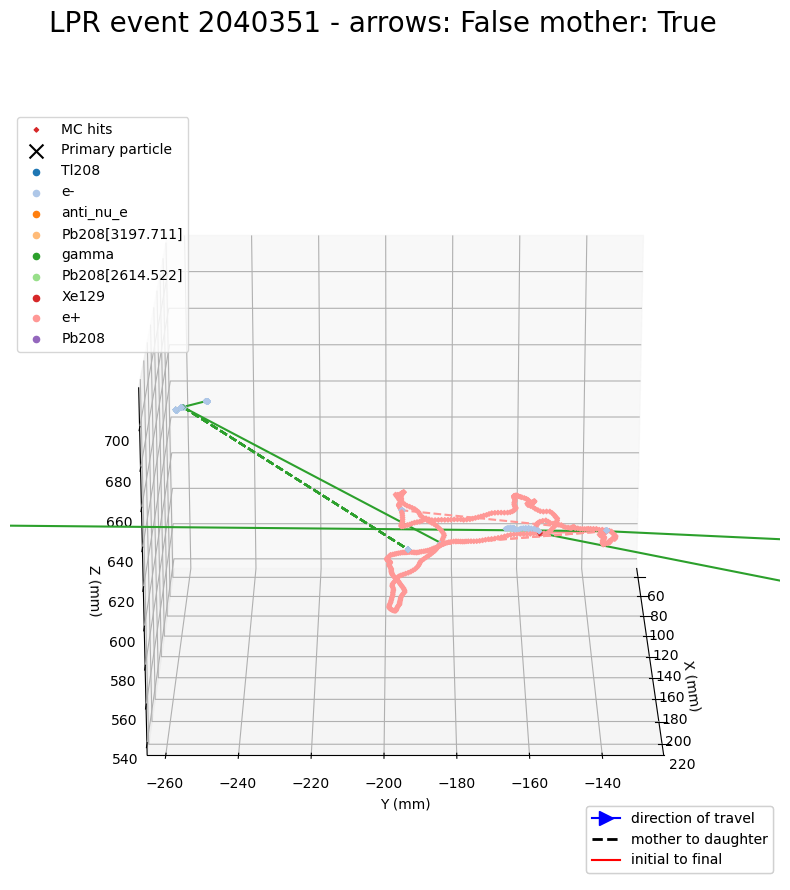

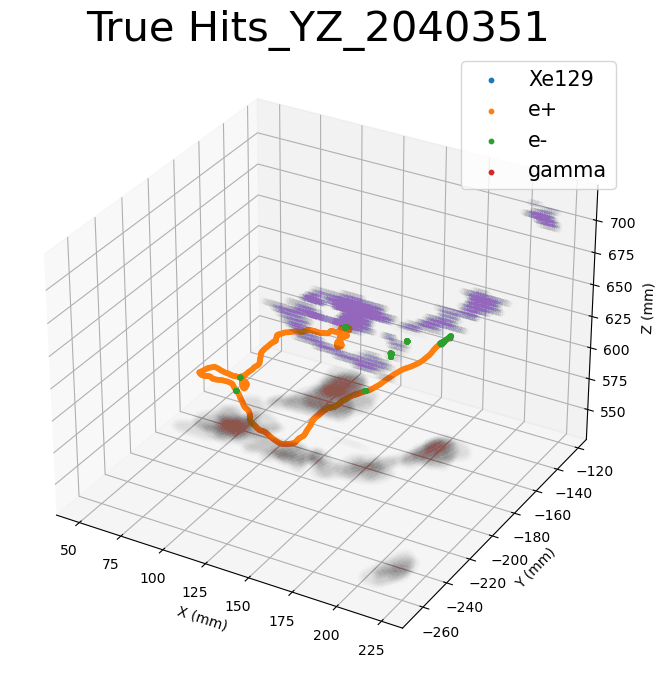

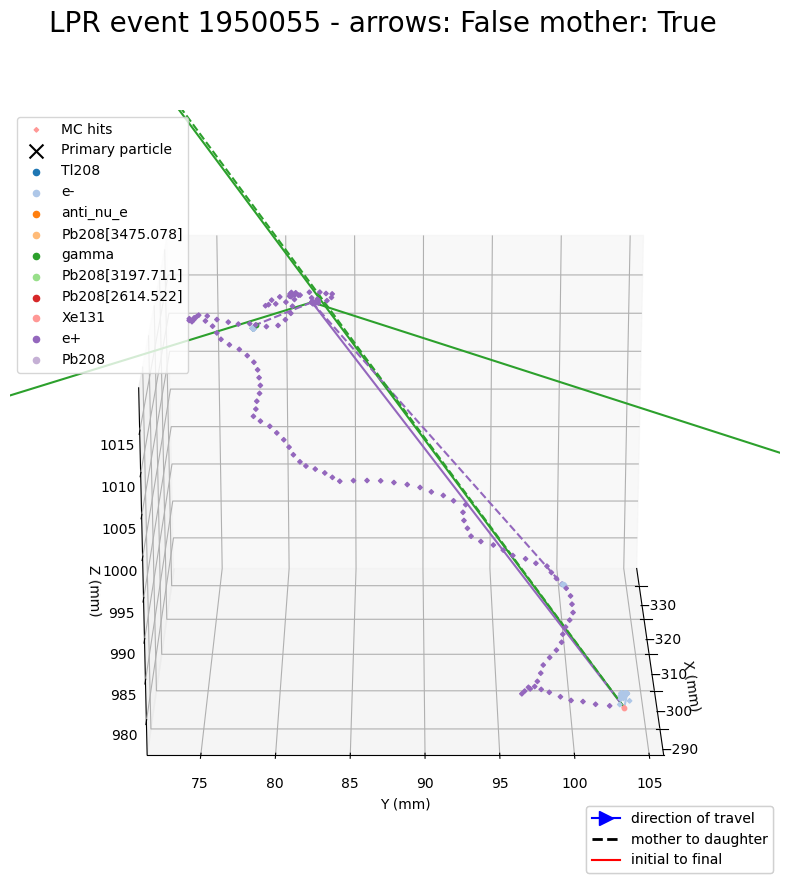

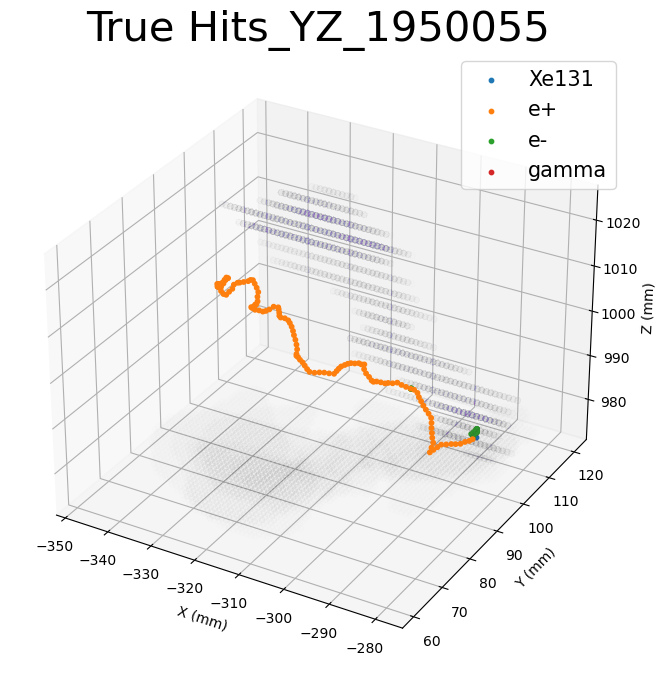

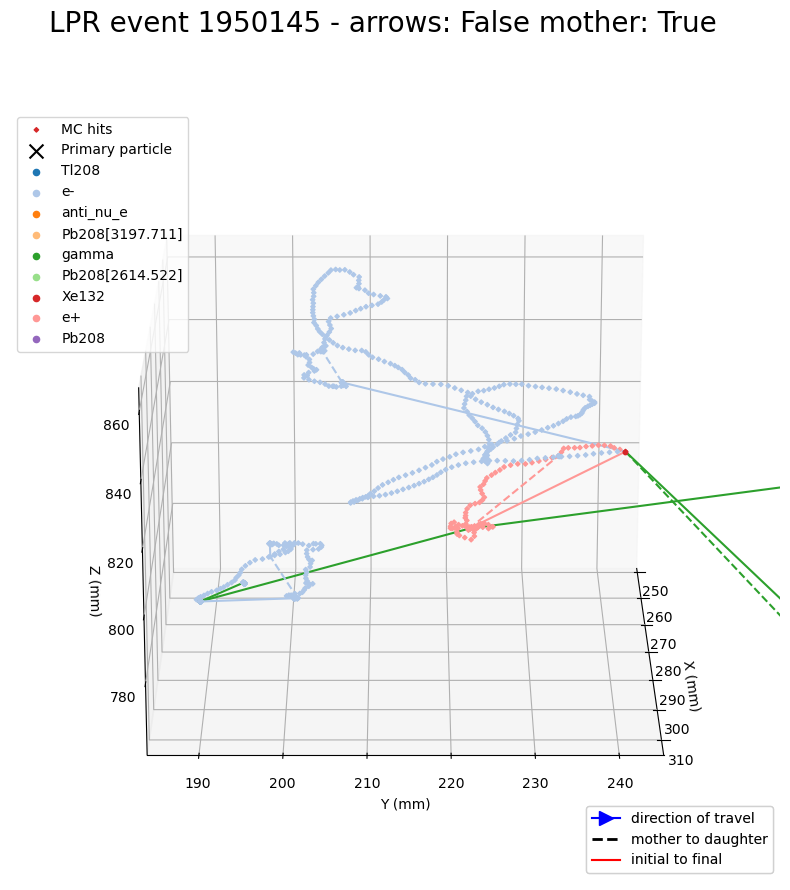

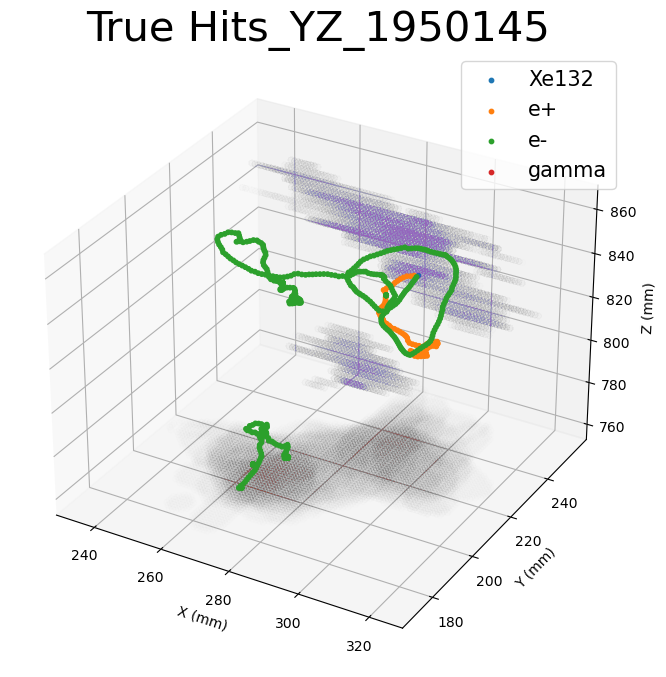

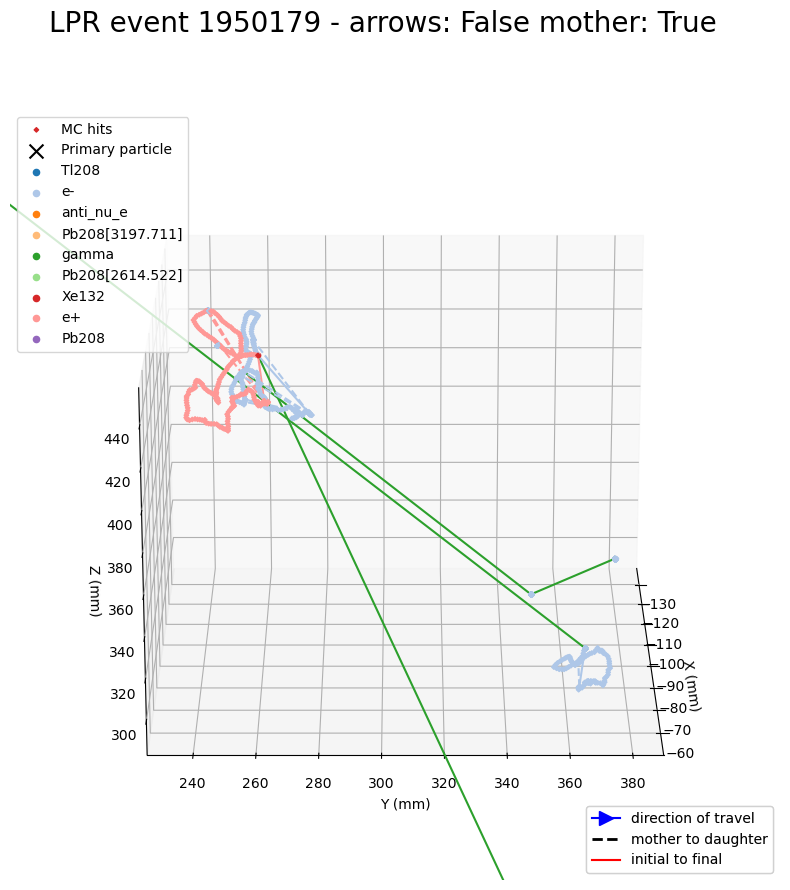

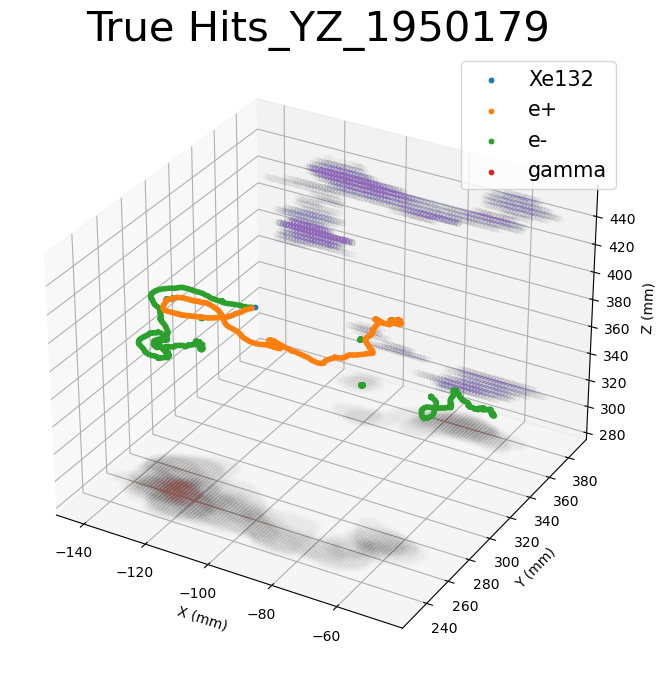

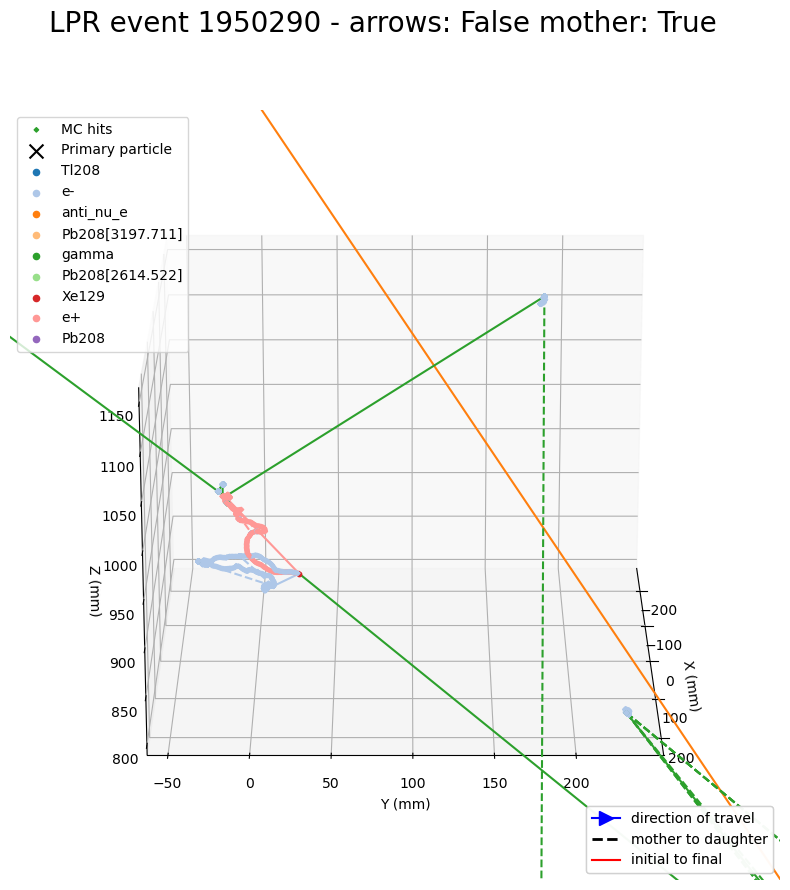

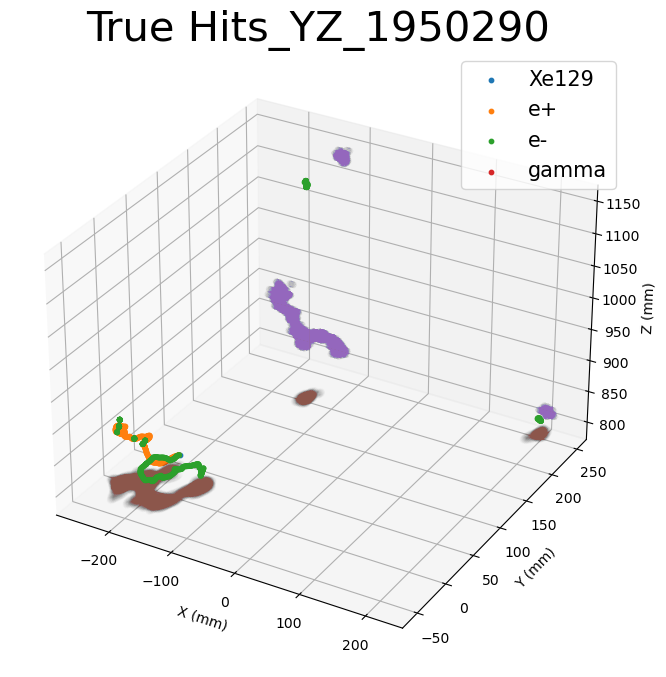

In [21]:
# read in data

# only keep the events we care about
data = pd.read_pickle('true_reco_v9.h5')

data_events = np.unique(data.event.to_numpy()) //2
display(data_events)


folder_path = 'data/'

softblock = 10



file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
for i, file in enumerate(file_names):

    dfMC = mcio.load_mchits_df(folder_path + file).reset_index()
    dfP = mcio.load_mcparticles_dfnew(folder_path + file).reset_index()
    
    eventsMC = np.unique(dfMC.event_id.to_numpy())

    deco = pd.read_hdf(folder_path + file, 'DECO/Events')

    # take the dodgy ones
    dfMC_dodgys = dfMC[dfMC.event_id.isin(data_events)]
    dfP_dodgys = dfP[dfP.event_id.isin(data_events)]
    
    # plot the dodgy events
    for q in np.unique(dfMC_dodgys.event_id.to_numpy()):
        plot_all_info(dfMC_dodgys, dfP_dodgys, data, q, deco)

    if i > softblock:
        break


